### Vizualizacija WESAD Features 

Uporablja rutine v FeatureGen2a.py

Zapisnik dela:
* 2024-11-22 Koda nalaganje features podatkov za vizualizacijo





In [9]:

import pickle
import warnings
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
warnings.simplefilter(action = 'ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from numpy import linalg as LA
from sklearn.datasets import make_classification
sns.set()


sns.set_style('darkgrid')


In [10]:
# NASTAVITVE
# KONFIGURACIJA
Cn = {}

OUT_FOLDER = r'D:/apps/podatki/output'
OUT_FN = ''

Cn['TEST_NAME'] = 'AB9_'
Cn['TEST_NUM'] = 'NEST_300'

feat_names_all = ['ACC_C', 'Temp_C', 'SCR_C', 'HR_C', 'EDA_C', 'EMG_C', 'Resp_C',
                'ACC_W', 'Temp_W', 'EDA_W', 'SCR_W', 'HR_W']

Cn['feat_selected'] = [ 'ACC_C' , 'Resp_C', 'EDA_C', 'SCR_C', 'HR_C', 'EMG_C', 'Temp_C']
                 #'ACC_W', 'Temp_W', 'EDA_W', 'SCR_W', 'HR_W']


use_wrist = 1
use_chest = 1

# Nalozi feature podatke za vse subjekte v datas
# Nastavi pot do podatkov
data_set = r'D:/apps/podatki'

# PODDIREKTORIJ S PODATKI ZNACILK
Cn['FEATURESDIR'] =  '/FEATURES_5s/FEATURES_5s'

# Sampling za izbrani dataset v sekundah
Cn['sampling_ts'] = 10

Cn['SUBJECTS_PLOT'] = [2, 3,4,5,6,7,9,10,11,13,14,15,16,17]

# Vhodni podatki, stevilo dodatnih stolpcev poleg features
NCOLS = 4
COLS_DROP = ['Target', 'ID', 'Time', 'OrigTarget']

# NASTAVI, KATERI SO RAZREDI, KI JIH FILTRIRAMO 
# 0: klas 1 naj bo amusement, meditation, 0 stres
# 1: 0 non-stress: baseline, amusement, class 1: stres
# 2: 3 class
# 3: originialni 1..4
# 4: vsi originalni 0..7
# 5: 0 baseline, 1 stres
Cn['classes_selection'] = 2

# KATERI SCALING
# 0 - brez, 
# 1 preko vseh oseb, 
# 2 vsaka oseba posebej, 
# 3 oseba baseline stanje ima std=1, mean 0    # individualno, normiranje na ne-stres: baseline + amusement
# 4 MinMax scaler
# 5 individualno, normiranje na baseline
# 6 individualno ekvaliziran histogram enakom porazdelitev  QUANTILE TRANSFORM UNIFORM
# 7 Robust scaler individualno
# 8 individualno, normiranje na baseline, Robust Scaler
# 9 Quantile transform, normal distr
# 10 QUANTILE TRANSFORM, NORMAL, ALL
Cn['scaling_type'] = 1



In [11]:
from FeatureGen2a import load_subj_data, generate_dataframe
# LOADING PODATKOV

# Lista direktno loadanih podatkov dataframov za vse subjekte
datas = []
for subjId in Cn['SUBJECTS_PLOT']:
    
    d1subj = load_subj_data(data_set+Cn['FEATURESDIR'], subjId, Cn['sampling_ts'])

    print('SUBJECT: ', subjId, ' Data size: ', d1subj.shape)
    datas.append(d1subj)



data_loaded, data_labels =  generate_dataframe (datas, Cn['feat_selected'], classes_type = Cn['classes_selection'])


columns = data_loaded.columns

TARGET_CLS = len(data_loaded['Target'].unique())
print(" NUM CLASSES: ", TARGET_CLS)

# Opis podatkov
data_loaded.describe()


SUBJECT:  2  Data size:  (1203, 104)
SUBJECT:  3  Data size:  (1286, 104)
SUBJECT:  4  Data size:  (1272, 104)
SUBJECT:  5  Data size:  (1239, 104)
SUBJECT:  6  Data size:  (1402, 104)
SUBJECT:  7  Data size:  (1035, 104)
SUBJECT:  9  Data size:  (1032, 104)
SUBJECT:  10  Data size:  (1087, 104)
SUBJECT:  11  Data size:  (1034, 104)
SUBJECT:  13  Data size:  (1095, 104)
SUBJECT:  14  Data size:  (1097, 104)
SUBJECT:  15  Data size:  (1038, 104)
SUBJECT:  16  Data size:  (1114, 104)
SUBJECT:  17  Data size:  (1172, 104)
  Data samples:  (425, 105)
  Data samples:  (432, 105)
  Data samples:  (432, 105)
  Data samples:  (444, 105)
  Data samples:  (440, 105)
  Data samples:  (439, 105)
  Data samples:  (440, 105)
  Data samples:  (459, 105)
  Data samples:  (446, 105)
  Data samples:  (450, 105)
  Data samples:  (445, 105)
  Data samples:  (447, 105)
  Data samples:  (444, 105)
  Data samples:  (455, 105)
Index([700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711], dtype='int64')


,ACC_X_mean_C,ACC_Y_mean_C,ACC_Z_mean_C,ACC_X_std_C,ACC_Y_std_C,ACC_Z_std_C,ACC_X_max_C,ACC_Y_max_C,ACC_Z_max_C,ACC_X_iabs_C,...,SCR_std_C,SCL_std_C,SCR_peaks_C,EMG_mean_C,EMG_std_C,EMG_dynamic_range_C,Time,ID,Target,OrigTarget
count,6186.000000,6186.000000,6186.000000,6186.000000,6186.000000,6186.000000,6186.000000,6186.000000,6186.000000,6186.000000,...,6186.000000,6186.000000,6186.000000,6186.000000,6186.000000,6186.000000,6186.000000,6186.000000,6186.000000,6186.000000
mean,0.804572,-0.028746,-0.343480,0.009718,0.011122,0.019693,0.841098,0.100856,0.425946,4.021710,...,0.000649,0.053494,5386.432913,-0.002985,0.013204,-2.213478,3769.877142,9.513579,1.636599,1.636599
std,0.131418,0.104111,0.263854,0.010859,0.014276,0.024852,0.142725,0.091851,0.223094,0.656903,...,0.000299,0.100360,49.600549,0.000926,0.005456,6.325438,2837.480457,4.849712,0.753657,0.753657
min,0.260178,-0.554856,-0.944015,0.002081,0.001991,0.003645,0.272800,0.007800,0.027400,1.300522,...,0.000212,0.004326,5245.000000,-0.004501,0.006670,-18.971475,50.000000,2.000000,1.000000,1.000000
25%,0.724646,-0.056883,-0.544147,0.004114,0.003703,0.007916,0.767000,0.048200,0.251800,3.622180,...,0.000418,0.010045,5356.000000,-0.003551,0.009746,-7.116814,1470.000000,5.000000,1.000000,1.000000
50%,0.860502,-0.017431,-0.308709,0.006128,0.005989,0.013011,0.889400,0.073400,0.395800,4.301287,...,0.000617,0.019231,5388.000000,-0.003045,0.011585,-2.565087,2675.000000,10.000000,1.000000,1.000000
75%,0.897930,0.023180,-0.170714,0.011195,0.012278,0.022348,0.929600,0.117800,0.608600,4.488365,...,0.000809,0.052932,5416.000000,-0.002561,0.015444,1.836854,5640.000000,14.000000,2.000000,2.000000
max,0.916965,0.275543,0.672769,0.255368,0.187758,0.427925,1.553400,0.622200,1.041800,4.583515,...,0.001933,1.798701,5761.000000,0.002445,0.063375,18.651088,11830.000000,17.000000,3.000000,3.000000


In [12]:
from FeatureGen2a import data_scaling

# 1. FEATURE SKALIRANJE GLEDE NA IZBRANI NAČIN

data_scaled = data_scaling(data_loaded, scaling_type=Cn['scaling_type'])
data_scaled.describe()

# PODATKI ZA LEARNING
data = data_scaled

[ 8.04571812e-01 -2.87461354e-02 -3.43480448e-01  9.71832289e-03
  1.11217973e-02  1.96934425e-02  8.41098222e-01  1.00856386e-01
  4.25946395e-01  4.02170956e+00  3.40727106e-01  1.82527371e+00
  9.30051240e-01  8.01544789e-03  4.64892737e+00  8.62490774e+01
  1.28033442e+01  1.20574079e+02  1.20574079e+02  1.94311348e+01
  2.48337668e-01  8.05904327e-02  7.52447251e-01  8.44652898e-02
  4.28426257e-04  7.36063469e-01  3.08800430e-02  2.23277855e+00
  1.16656274e-01  1.98132271e+00  1.83048878e+00  7.39363513e-01
  5.93104411e-01  1.12349741e+00  1.60505580e+01  1.74809885e+01
  1.56612728e+02  3.00286712e+01  1.69632451e+01  8.22042092e+00
  8.19574151e+00  3.78238201e+00  3.42985857e+00  3.37005740e+01
  4.72242692e-02  9.60341431e-02  4.95921686e-07  4.65169569e+00
  5.58517340e-02  1.32718319e+00  3.34440117e-07  1.22670064e-10
  4.65169569e+00  6.48858637e-04  5.34937107e-02  5.38643291e+03
 -2.98512416e-03  1.32038364e-02 -2.21347803e+00]
59
(6186, 59)


In [13]:
# KATERE ZNACILKE SO V PODATKIH

all_feats = data.columns.to_list()[0:-NCOLS]
print(all_feats)

# IZBEREMO EN DEL
selected_feats = all_feats[0:5]
print(selected_feats)


['ACC_X_mean_C', 'ACC_Y_mean_C', 'ACC_Z_mean_C', 'ACC_X_std_C', 'ACC_Y_std_C', 'ACC_Z_std_C', 'ACC_X_max_C', 'ACC_Y_max_C', 'ACC_Z_max_C', 'ACC_X_iabs_C', 'ACC_Y_iabs_C', 'ACC_Z_iabs_C', 'ACC_3D_mean_C', 'ACC_3D_std_C', 'ACC_3D_iabs_C', 'HR_mean_ECG_C', 'HR_std_ECG_C', 'HR_max_ECG_C', 'HR_min_ECG_C', 'HR_NN50_ECG_C', 'HR_pNN50_ECG_C', 'HR_rmssd_ECG_C', 'HR_rr_mean_ECG_C', 'HR_rr_std_ECG_C', 'HR_ULF_ECG_C', 'HR_HF_ECG_C', 'HR_LF_ECG_C', 'HR_UHF_ECG_C', 'HR_rate_L_H_ECG_C', 'resp_I_mean_dur_C', 'resp_E_mean_dur_C', 'resp_I_std_dur_C', 'resp_E_std_dur_C', 'resp_IE_ratio_C', 'resp_I_ampl_max_C', 'resp_E_ampl_max_C', 'resp_volume_C', 'resp_rate_mean_C', 'resp_rate_std_C', 'resp_I_mean_C', 'resp_E_mean_C', 'resp_I_std_C', 'resp_E_std_C', 'Temp_C_mean', 'Temp_C_std', 'Temp_C_dynamic_range', 'Temp_C_slope', 'EDA_C_mean', 'EDA_C_std', 'EDA_C_dynamic_range', 'EDA_C_slope', 'SCR_mean_C', 'SCL_mean_C', 'SCR_std_C', 'SCL_std_C', 'SCR_peaks_C', 'EMG_mean_C', 'EMG_std_C', 'EMG_dynamic_range_C']
['ACC

In [14]:
import ipywidgets as widgets
from ipywidgets import interact
import plotly.express as px



# Widgets for selecting feature, persons, and states
feature_selector = widgets.Dropdown(
  options=data.columns[0:3],
  description='Feature:',
)

person_selector = widgets.SelectMultiple(
  options=data['ID'].unique(),
  value=list(data['ID'].unique()),
  description='Persons:',
)

state_selector = widgets.SelectMultiple(
  options=data['OrigTarget'].unique(),
  value=list(data['OrigTarget'].unique()),
  description='States:',
)

# Interactive plotting function
def plot_histograms(feature, persons, states):
  filtered_data = data[data['ID'].isin(persons) & data['OrigTarget'].isin(states)]
  if filtered_data.empty:
    print("No data available for the selected options.")
  else:
    fig = px.histogram(
      filtered_data,
      x=feature,
      color='OrigTarget',
      facet_row='ID',
      title=f'Histogram of {feature} by State and Person',
    )
    fig.show()

# Create interactive widget
interact(
  plot_histograms,
  feature=feature_selector,
  persons=person_selector,
  states=state_selector,
)

interactive(children=(Dropdown(description='Feature:', options=('ACC_X_mean_C', 'ACC_Y_mean_C', 'ACC_Z_mean_C'…

<function __main__.plot_histograms(feature, persons, states)>

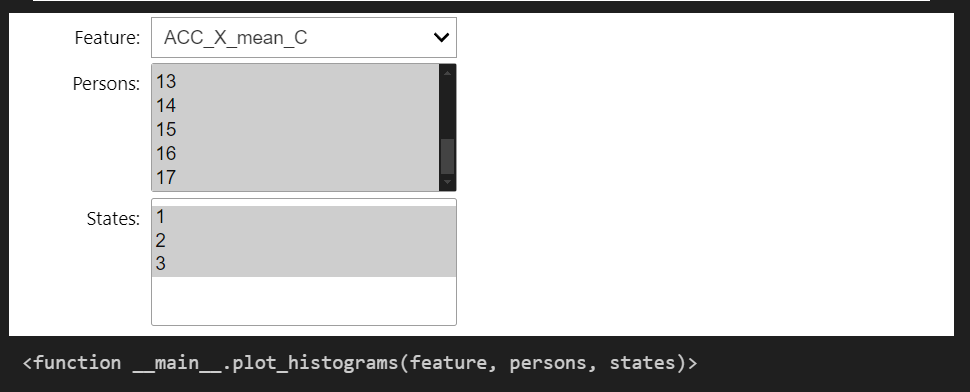

In [15]:


# Assuming 'datas' is a list of DataFrames, one for each subject

# and 'Cn['SUBJECTS_PLOT']' is the list of subject IDs

 

# Add 'Person' column to each subject's DataFrame and concatenate

data_list = []

for subj_data, subj_id in zip(datas, Cn['SUBJECTS_PLOT']):

    subj_data = subj_data.copy()

    subj_data['Person'] = subj_id

    data_list.append(subj_data)

 

# Combine all subject data into one DataFrame

 

# data_loaded = pd.concat(data_list, ignore_index=True)

 

data_loaded = data_scaled

data_loaded.rename(columns={'ID': 'Person'}, inplace=True)

 

# Rename 'Target' column to 'State' for clarity

data_loaded.rename(columns={'Target': 'State'}, inplace=True)

 

# List of feature columns

non_feature_cols = ['Person', 'State']

feature_cols = [col for col in data_loaded.columns if col not in non_feature_cols]

 

# Interactive plotting function

def plot_boxplots(feature, persons, states):

    filtered_data = data_loaded[data_loaded['Person'].isin(persons) & data_loaded['State'].isin(states)]

    if filtered_data.empty:

        print("No data available for the selected options.")

    else:

        fig = px.box(

            filtered_data,

            x='State',

            y=feature,

            color='Person',

            title=f'Box Plot of {feature} by State and Person',

        )

        fig.show()

 

# Widgets for selecting feature, persons, and states

feature_selector = widgets.Dropdown(

    options=feature_cols,

    description='Feature:',

)

 

person_selector = widgets.SelectMultiple(

    options=data_loaded['Person'].unique(),

    value=list(data_loaded['Person'].unique()),

    description='Persons:',

)

 

state_selector = widgets.SelectMultiple(

    options=data_loaded['State'].unique(),

    value=list(data_loaded['State'].unique()),

    description='States:',

)

 

# Create interactive widget

interact(

    plot_boxplots,

    feature=feature_selector,

    persons=person_selector,

    states=state_selector,

)

interactive(children=(Dropdown(description='Feature:', options=('ACC_X_mean_C', 'ACC_Y_mean_C', 'ACC_Z_mean_C'…

<function __main__.plot_boxplots(feature, persons, states)>

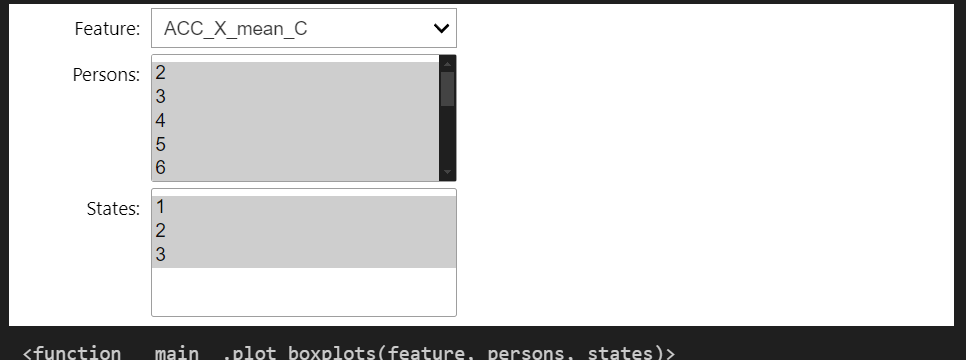

In [16]:
#ss
def plot_time_series(feature, persons, states):
    filtered_data = data_loaded[data_loaded['Person'].isin(persons) & data_loaded['State'].isin(states)]
    if filtered_data.empty:
        print("No data available for the selected options.")
    else:
        fig = px.line(
            filtered_data,
            x='Time',
            y=feature,
            color='Person',
            title=f'Time Series of {feature} Over Time',
        )
        fig.show()

interact(
    plot_time_series,
    feature=feature_selector,
    persons=person_selector,
    states=state_selector,
)

interactive(children=(Dropdown(description='Feature:', options=('ACC_X_mean_C', 'ACC_Y_mean_C', 'ACC_Z_mean_C'…

<function __main__.plot_time_series(feature, persons, states)>

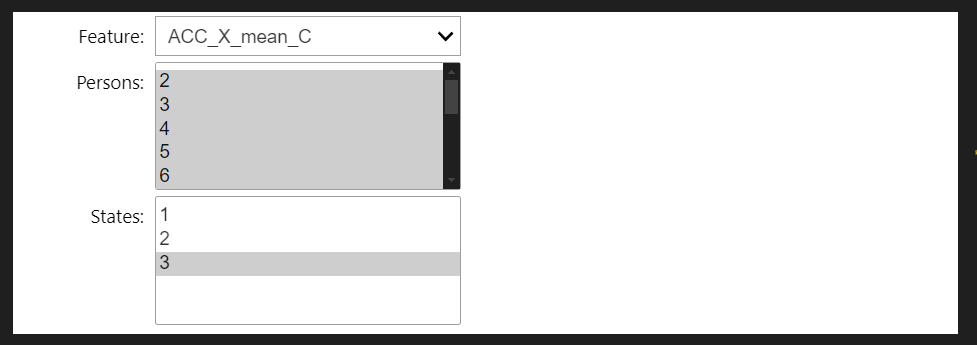